<a href="https://colab.research.google.com/github/sudhakarmlal/EVA/blob/master/Phase2/Session%2016%20%26%20Assignment%20EVA2OR3/BeagleDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

drive  sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 12449, done.
remote: Total 12449 (delta 0), reused 0 (delta 0), pack-reused 12449
Receiving objects: 100% (12449/12449), 11.39 MiB | 24.65 MiB/s, done.
Resolving deltas: 100% (8494/8494), done.


In [4]:
ls drive/'My Drive'

 2020-02-13-05-18-53.flv    model.h5
 CIF/                       model_weights_img_aug_0_10_densbc.h5
 CIFAR/                     model_weights_img_aug_0_30_max_params_x.h5
'Colab Notebooks'/         'model_weights_img_aug_0_76_max_params_x (1).h5'
 data_for_colab.zip         model_weights_img_aug_0_76_max_params_x.h5
'Getting started.pdf'       model_weights_img_aug_0_77_max_params_x.h5
 IMGAUG_CF/                 model_weights_img_aug_100_110_max_params_x.h5
 MathsClass/                model_weights_img_aug_10_30_dens_arc.h5
'model_106_Epochs (1).h5'   model_weights_img_aug_30_40.h5
 model_106_Epochs.h5        model_weights_img_aug_30_50_max_params_x.h5
'model (10).h5'             model_weights_img_aug_30_60_decay_half.h5
'model (11).h5'             model_weights_img_aug_30_60.h5
'model (12).h5'             model_weights_img_aug_40_50_max_params_2x.h5
'model (13).h5'             model_weights_img_aug_40_60_op.h5
'model (14).h5'             model_weights_img_aug_50_70_max_params_x.h5


In [0]:
cp drive/'My Drive'/data_for_colab.zip /content/darknet

In [6]:
cd darknet

/content/darknet


In [7]:
ls

3rdparty/     CMakeLists.txt          image_yolov3.sh*        scripts/
appveyor.yml  DarknetConfig.cmake.in  include/                src/
build/        darknet.py              json_mjpeg_streams.sh*  video_v2.sh*
build.ps1*    darknet_video.py        LICENSE                 video_yolov3.sh*
build.sh*     data/                   Makefile
cfg/          data_for_colab.zip      net_cam_v3.sh*
cmake/        image_yolov2.sh*        README.md


In [8]:
!unzip data_for_colab

Archive:  data_for_colab.zip
   creating: data_for_colab/
  inflating: data_for_colab/.DS_Store  
   creating: data_for_colab/data/
  inflating: data_for_colab/data/.DS_Store  
  inflating: data_for_colab/data/1.jpg  
  inflating: data_for_colab/data/1.txt  
  inflating: data_for_colab/data/10.jpg  
 extracting: data_for_colab/data/10.txt  
  inflating: data_for_colab/data/100.jpg  
 extracting: data_for_colab/data/100.txt  
  inflating: data_for_colab/data/101.jpg  
 extracting: data_for_colab/data/101.txt  
  inflating: data_for_colab/data/102.jpg  
  inflating: data_for_colab/data/102.txt  
  inflating: data_for_colab/data/103.jpg  
  inflating: data_for_colab/data/103.txt  
  inflating: data_for_colab/data/104.jpg  
 extracting: data_for_colab/data/104.txt  
  inflating: data_for_colab/data/105.jpg  
  inflating: data_for_colab/data/105.txt  
  inflating: data_for_colab/data/106.jpg  
  inflating: data_for_colab/data/106.txt  
  inflating: data_for_colab/data/107.jpg  
  inflating:

In [11]:
#upload train test.txt files
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving test.txt to test.txt
saved file test.txt


In [12]:
!apt-get update
!apt-get upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [83.1 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRele

In [13]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
libavcodec-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libswscale-dev set to manually installed.
The following package 

In [14]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [15]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [16]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [17]:
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 6 not upgraded.
Need to get 6,721 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.1 [49.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.1 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 

In [18]:
ls

 3rdparty/                darknet_video.py         Makefile
 appveyor.yml             data/                    net_cam_v3.sh*
 build/                   data_for_colab/          README.md
 build.ps1*               data_for_colab.zip       scripts/
 build.sh*                image_yolov2.sh*         src/
 cfg/                     image_yolov3.sh*         test.txt
 cmake/                   include/                'train (1).txt'
 CMakeLists.txt           json_mjpeg_streams.sh*   train.txt
 DarknetConfig.cmake.in   LICENSE                  video_v2.sh*
 darknet.py               __MACOSX/                video_yolov3.sh*


In [19]:
#Now let's get some YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

 3rdparty		  darknet_video.py	  Makefile
 appveyor.yml		  data			  net_cam_v3.sh
 build			  data_for_colab	  README.md
 build.ps1		  data_for_colab.zip	  scripts
 build.sh		  image_yolov2.sh	  src
 cfg			  image_yolov3.sh	  test.txt
 cmake			  include		 'train (1).txt'
 CMakeLists.txt		  json_mjpeg_streams.sh   train.txt
 DarknetConfig.cmake.in   LICENSE		  video_v2.sh
 darknet.py		  __MACOSX		  video_yolov3.sh
--2020-02-16 12:50:53--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  13.9MB/s    in 12s     

2020-02-16 12:51:05 (19.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [20]:
#No here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

 3rdparty		  data			  README.md
 appveyor.yml		  data_for_colab	  scripts
 build			  data_for_colab.zip	  src
 build.ps1		  image_yolov2.sh	  test.txt
 build.sh		  image_yolov3.sh	 'train (1).txt'
 cfg			  include		  train.txt
 cmake			  json_mjpeg_streams.sh   video_v2.sh
 CMakeLists.txt		  LICENSE		  video_yolov3.sh
 DarknetConfig.cmake.in   __MACOSX		  yolov3.weights
 darknet.py		  Makefile
 darknet_video.py	  net_cam_v3.sh


In [21]:
!ls
%cd ../
!ls

 3rdparty		  data			  README.md
 appveyor.yml		  data_for_colab	  scripts
 build			  data_for_colab.zip	  src
 build.ps1		  image_yolov2.sh	  test.txt
 build.sh		  image_yolov3.sh	 'train (1).txt'
 cfg			  include		  train.txt
 cmake			  json_mjpeg_streams.sh   video_v2.sh
 CMakeLists.txt		  LICENSE		  video_yolov3.sh
 DarknetConfig.cmake.in   __MACOSX		  yolov3.weights
 darknet.py		  Makefile
 darknet_video.py	  net_cam_v3.sh
/content
darknet  drive	sample_data


In [22]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 6 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base

In [23]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

6 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2020-02-16 12:52:13--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?aH_sW44qAWmnkhIzYc2H4lorOX8id2kVSkEthJ_94ol2PHTrPe_wAb-83Pv4VQ_sG2E-b4ofp6s1Fo6ZWunHMX0bjnA0iwsJ18hPXIByqXcpm07cXLhzeEvgSYF2vESFPoxT9ofQhAPVDZXlMES9HQaOjbI5FCRfmjJgxCgbreV2LcqQw5PAAydOKPbP-cAo_6Q7ieDrH9zb0WbLjavrlRbjsQ [following]
--2020-02-16 12:52:14--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?aH_sW44qAWmnkhIzYc2H4lo

In [24]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [25]:
ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  drive/
darknet/                                               sample_data/


In [26]:
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: At global scope:
./src/image_opencv.cpp:427:14: warning: ‘float get_pixel(image, int, int, int)’ defined but not used [-Wunused-function]
 static float get_pixel(image m, int x, int y, int c)
              ^
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unus

In [28]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 3rdparty		  darknet_video.py	  obj
 appveyor.yml		  data			  predictions.jpg
 backup			  data_for_colab	  README.md
 build			  data_for_colab.zip	  results
 build.ps1		  image_yolov2.sh	  scripts
 build.sh		  image_yolov3.sh	  src
 cfg			  include		  test.txt
 cmake			  json_mjpeg_streams.sh  'train (1).txt'
 CMakeLists.txt		  LICENSE		  train.txt
 darknet		  __MACOSX		  video_v2.sh
 DarknetConfig.cmake.in   Makefile		  video_yolov3.sh
 darknet.py		  net_cam_v3.sh		  yolov3.weights
 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.

In [0]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

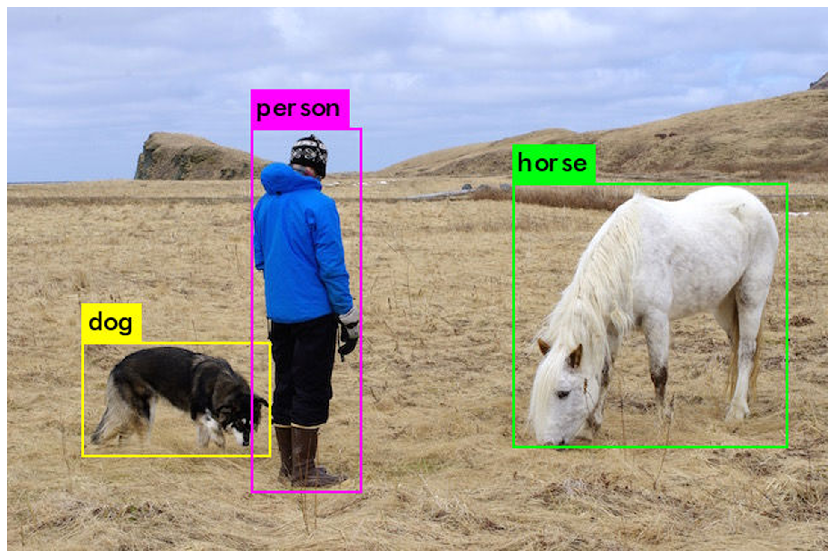

In [31]:
imShow('predictions.jpg')

In [57]:
cat /content/darknet/data_for_colab/test.txt

/content/darknet/data_for_colab/data/107.jpg
/content/darknet/data_for_colab/data/116.jpg
/content/darknet/data_for_colab/data/125.jpg
/content/darknet/data_for_colab/data/134.jpg
/content/darknet/data_for_colab/data/143.jpg
/content/darknet/data_for_colab/data/152.jpg
/content/darknet/data_for_colab/data/161.jpg
/content/darknet/data_for_colab/data/171.jpg
/content/darknet/data_for_colab/data/180.jpg
/content/darknet/data_for_colab/data/19.jpg
/content/darknet/data_for_colab/data/199.jpg
/content/darknet/data_for_colab/data/27.jpg
/content/darknet/data_for_colab/data/36.jpg
/content/darknet/data_for_colab/data/45.jpg
/content/darknet/data_for_colab/data/54.jpg
/content/darknet/data_for_colab/data/63.jpg
/content/darknet/data_for_colab/data/72.jpg
/content/darknet/data_for_colab/data/81.jpg
/content/darknet/data_for_colab/data/90.jpg


In [33]:
!./darknet detector train data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg data_for_colab/yolov3-tiny.conv.15 -dont_show

Streaming output truncated to the last 5000 lines.
Loaded: 0.000065 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.328841, GIOU: 0.296260), Class: 0.729462, Obj: 0.025642, No Obj: 0.005835, .5R: 0.250000, .75R: 0.031250, count: 32, class_loss = 1.091688, iou_loss = 2.424645, total_loss = 3.516333 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.003483, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.054783, iou_loss = 0.000000, total_loss = 0.054783 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.300471, GIOU: 0.270664), Class: 0.751338, Obj: 0.019840, No Obj: 0.005816, .5R: 0.212121, .75R: 0.060606, count: 33, class_loss = 1.116288, iou_loss = 2.832139, total_loss = 3.948427 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.003537, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.056538

KeyboardInterrupt: ignored

In [34]:
ls backup/

yolov3-tiny-obj_1000.weights  yolov3-tiny-obj_last.weights


In [59]:
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving test.jpg to test (1).jpg
saved file test.jpg


In [60]:
!./darknet detector test data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights test.jpg -i 0 -thresh 0.5

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
 

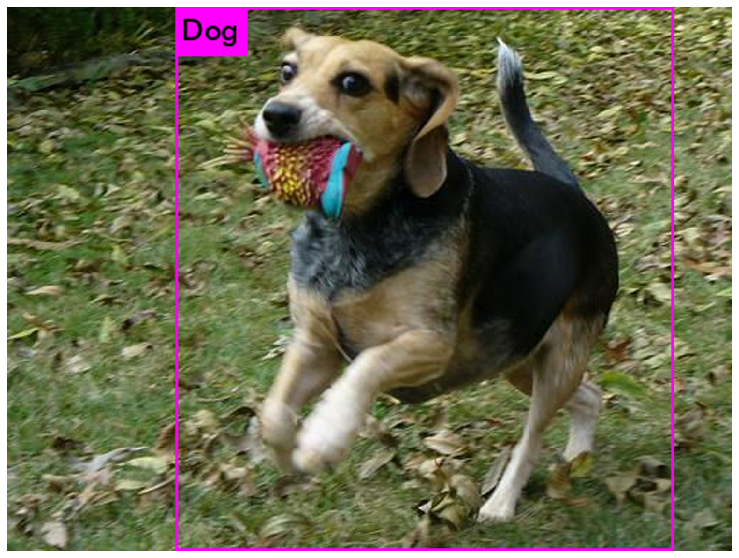

In [61]:
imShow('predictions.jpg')


In [62]:
cd ..

/content


In [70]:
cp drive/'My Drive'/bg.mp4 /content/darknet

cp: cannot stat 'drive/My Drive/bg.mp4': No such file or directory


In [67]:
cd /content/darknet

/content/darknet


In [68]:
ls

 20.jpg                      darknet.py               README.md
 3rdparty/                   darknet_video.py         results/
 appveyor.yml                data/                    scripts/
 backup/                     data_for_colab/          src/
 beagle.mp4                  data_for_colab.zip      'test (1).jpg'
 build/                      image_yolov2.sh*        'test (1).txt'
 build.ps1*                  image_yolov3.sh*         test.jpg
 build.sh*                   include/                 test.txt
 cfg/                        json_mjpeg_streams.sh*  'train (1).txt'
 chart.png                   LICENSE                  train.txt
 chart_yolov3-tiny-obj.png   __MACOSX/                video_v2.sh*
 cmake/                      Makefile                 video_yolov3.sh*
 CMakeLists.txt              net_cam_v3.sh*           yolov3.weights
 darknet*                    obj/
 DarknetConfig.cmake.in      predictions.jpg


In [71]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights  -dont_show beagle.mp4 -i 0 -out_filename veout.avi

Streaming output truncated to the last 5000 lines.
Dog: 26% 

FPS:43.4 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 28% 

FPS:42.8 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 30% 

FPS:41.9 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 32% 

FPS:42.1 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 31% 

FPS:42.4 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 30% 

FPS:42.6 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 27% 

FPS:42.6 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 27% 

FPS:42.6 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 29% 

FPS:42.5 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 26% 

FPS:42.7 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:


FPS:42.3 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 27% 

FPS:42.7 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 26% 

FPS:42.2 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:


FPS:42.3 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:


FPS:42.5 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:

Dog: 26% 

FPS:42.6 	 AVG_FPS:40.2

 cvWriteFrame 
Objects:


FP

In [72]:
download('veout.avi') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 48528, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
!./darknet detector calc_anchors Dataset/obj.data -num_of_clusters 5 -width 416 -height 416


 num_of_clusters = 5, width = 416, height = 416 
 read labels from 237 images 
 loaded 	 image: 30 	 box: 30

Wrong label: /content/darknet/Dataset/nfpa/pos-130.txt - j = 0, x = 0.508333, y = 0.473333, width = 1.010000, height = 0.613333 
 loaded 	 image: 73 	 box: 74

Wrong label: /content/darknet/Dataset/nfpa/pos-173.txt - j = 2, x = 0.440625, y = 0.969555, width = 0.000000, height = 0.000000 
 loaded 	 image: 236 	 box: 298Can't open label file. (This can be normal only if you use MSCOCO):  

 all loaded. 

 calculating k-means++ ...

 iterations = 13 


 avg IoU = 69.58 % 

Saving anchors to the file: anchors.txt 
anchors =   8, 17,  57, 75, 160,154, 199,284, 354,364
^C
